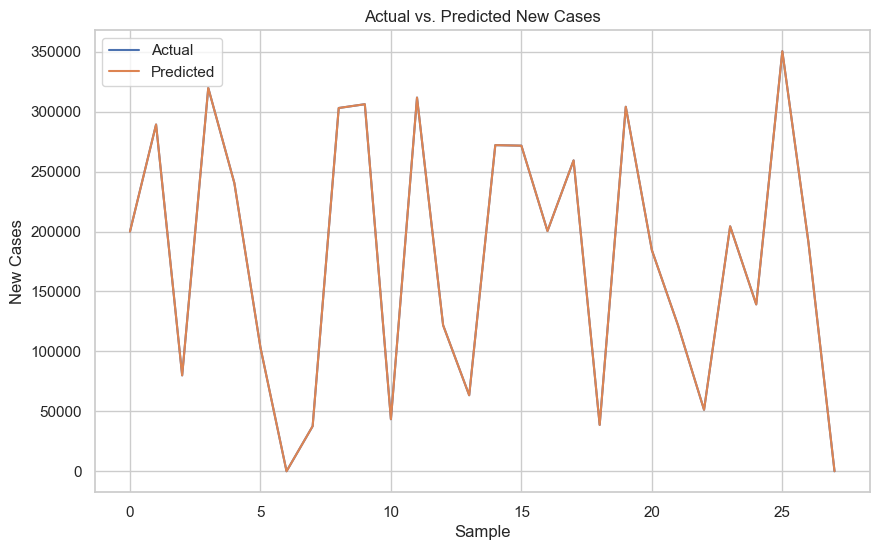

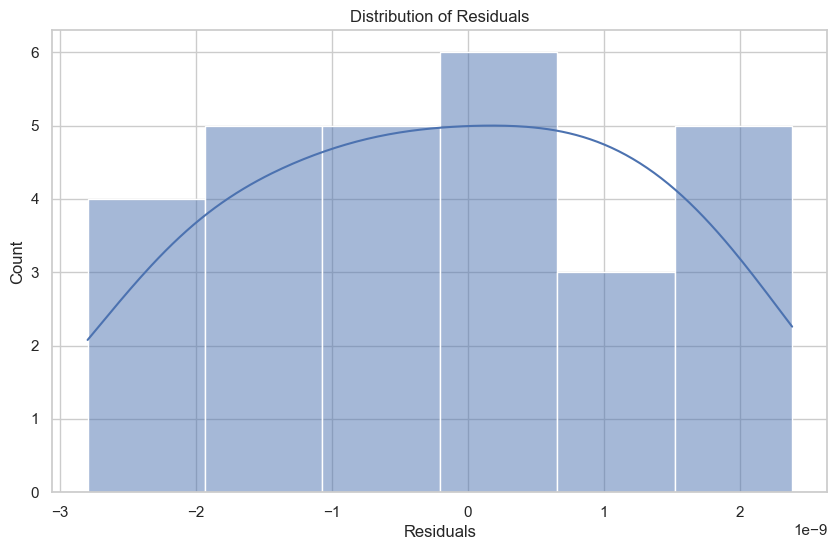

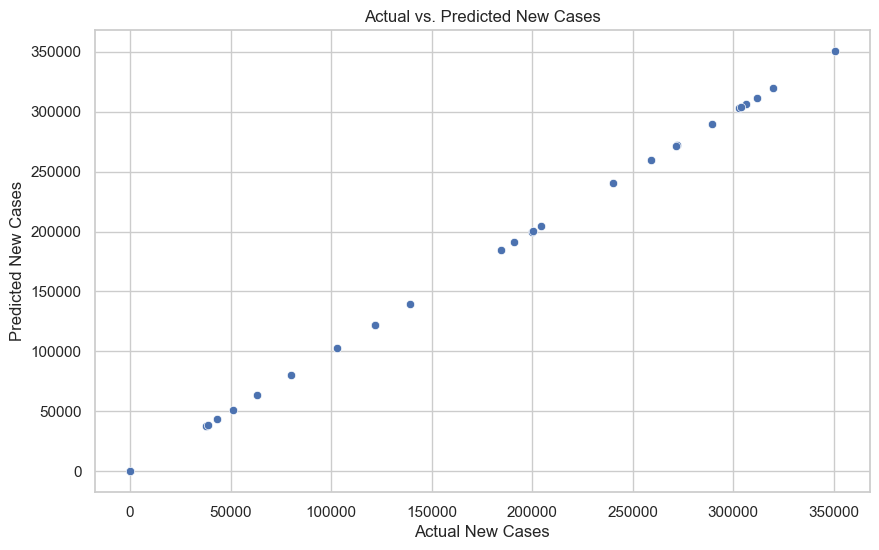

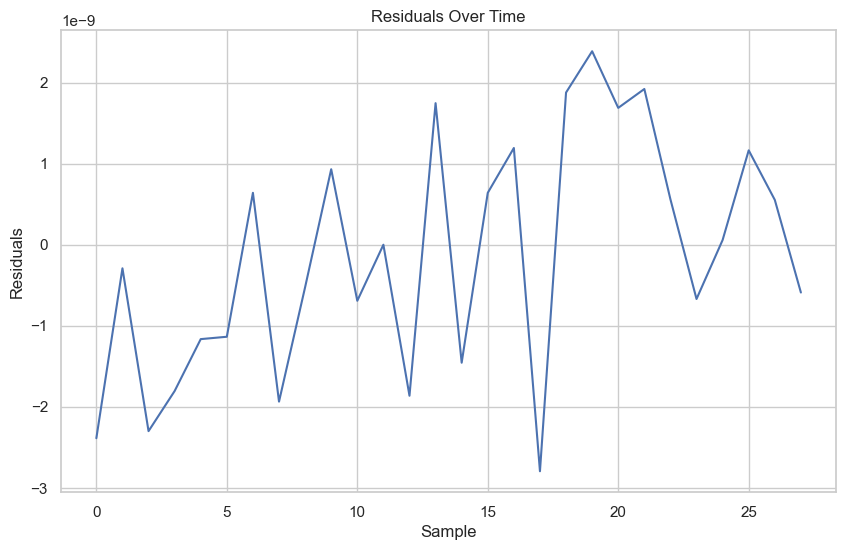

Mean Squared Error (MSE): 2.1267843979444264e-18
R-squared (R2): 1.0
count    2.800000e+01
mean    -1.514958e-10
std      1.477076e-09
min     -2.793968e-09
25%     -1.236913e-09
50%     -1.455192e-10
75%      9.895302e-10
max      2.386514e-09
Name: Residuals, dtype: float64


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load the prediction results
predictions = pd.read_csv('../data/processed/predictions.csv')

# Display the first few rows of the predictions
predictions.head()

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(predictions['Actual'], label='Actual')
plt.plot(predictions['Predicted'], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('New Cases')
plt.title('Actual vs. Predicted New Cases')
plt.legend()
plt.show()

# Calculate residuals
predictions['Residuals'] = predictions['Actual'] - predictions['Predicted']

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions['Residuals'], kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=predictions)
plt.xlabel('Actual New Cases')
plt.ylabel('Predicted New Cases')
plt.title('Actual vs. Predicted New Cases')
plt.show()

# Plot residuals over time
plt.figure(figsize=(10, 6))
plt.plot(predictions['Residuals'])
plt.xlabel('Sample')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.show()

# Calculate performance metrics
mse = ((predictions['Residuals']) ** 2).mean()
r2 = 1 - (sum((predictions['Actual'] - predictions['Predicted']) ** 2) / sum((predictions['Actual'] - predictions['Actual'].mean()) ** 2))

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Display some statistics about the residuals
print(predictions['Residuals'].describe())

# Save the notebook
import datetime
now = datetime.datetime.now()
filename = f"../notebooks/interpret_predictions_{now.strftime('%Y%m%d_%H%M%S')}.ipynb"
